<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مشکل بیش‌برازش داده‌ها یا Overfitting و معرفی Dropout</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه بدون Dropout</div>



In [1]:
# 1. Import libraries and modules
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train, y_train_original, x_test, y_test_original = load_hoda()

# 3. Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(x_test, y_test))


2024-05-29 17:21:37.879456: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 17:21:37.879660: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:21:37.881413: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:21:37.903981: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 17:21:38.296355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Epoch 1/150


/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2283 - loss: 2.2170 - val_accuracy: 0.4700 - val_loss: 1.9921
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5082 - loss: 1.8922 - val_accuracy: 0.6550 - val_loss: 1.6884
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6240 - loss: 1.5973 - val_accuracy: 0.7600 - val_loss: 1.3472
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 1.2536 - val_accuracy: 0.8050 - val_loss: 1.0386
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 0.9857 - val_accuracy: 0.8450 - val_loss: 0.8086
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8456 - loss: 0.7561 - val_accuracy: 0.8600 - val_loss: 0.6578
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8467 - loss: 0.6227 - val_accuracy: 0.8750 - val_loss: 0.5513
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8473 - loss: 0.5403 - val_accuracy: 0.8950 - val_loss: 0.4857
Epoch 9/150

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0918 - val_accuracy: 0.9300 - val_loss: 0.2266
Epoch 53/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9802 - loss: 0.0869 - val_accuracy: 0.9300 - val_loss: 0.2276
Epoch 54/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9814 - loss: 0.0857 - val_accuracy: 0.9250 - val_loss: 0.2244
Epoch 55/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0814 - val_accuracy: 0.9300 - val_loss: 0.2249
Epoch 56/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.0810 - val_accuracy: 0.9250 - val_loss: 0.2245
Epoch 57/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9770 - loss: 0.0880 - val_accuracy: 0.9250 - val_loss: 0.2302
Epoch 58/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9856 - loss: 0.0742 - val_accuracy: 0.9250 - val_loss: 0.2253
Epoch 59/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0679 - val_accuracy: 0.9250 - val_loss: 0.2247
Epoch

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9982 - loss: 0.0251 - val_accuracy: 0.9250 - val_loss: 0.2429
Epoch 104/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9959 - loss: 0.0287 - val_accuracy: 0.9200 - val_loss: 0.2450
Epoch 105/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0263 - val_accuracy: 0.9250 - val_loss: 0.2529
Epoch 106/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0247 - val_accuracy: 0.9200 - val_loss: 0.2447
Epoch 107/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9956 - loss: 0.0260 - val_accuracy: 0.9250 - val_loss: 0.2455
Epoch 108/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0234 - val_accuracy: 0.9250 - val_loss: 0.2521
Epoch 109/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0293 - val_accuracy: 0.9200 - val_loss: 0.2527
Epoch 110/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0233 - val_accuracy: 0.9200 - val_loss: 0.249

Test Accuracy: 0.9150000214576721 
Maximum Test Acuracy During Training:  0.9350000023841858


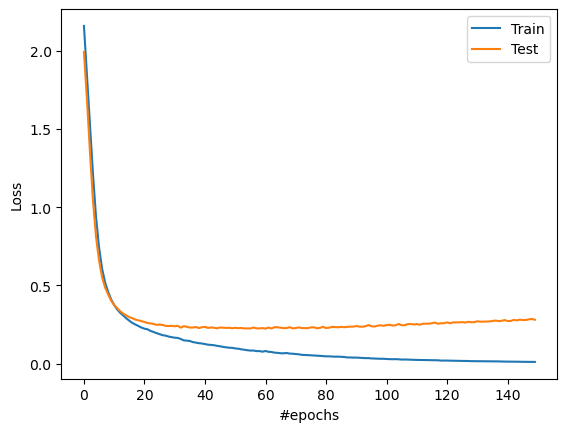

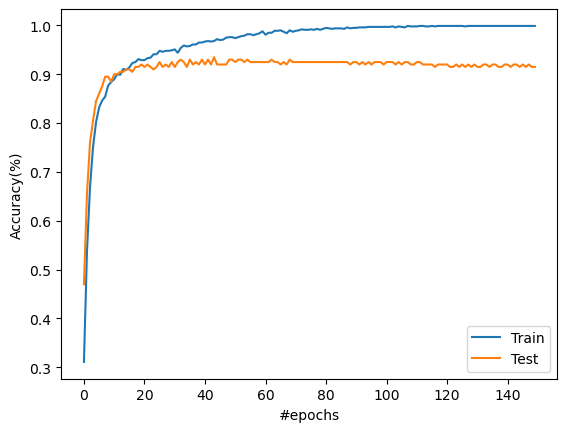

In [2]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ", 
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه با Dropout</div>



In [7]:
# 1. Import libraries and modules
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train, y_train_original, x_test, y_test_original = load_hoda()

# 3. Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(x_test, y_test))


Epoch 1/150
8/8 [==============================] - 2s 64ms/step - loss: 2.2936 - accuracy: 0.1428 - val_loss: 2.1227 - val_accuracy: 0.4150
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 2.0810 - accuracy: 0.3200 - val_loss: 1.9229 - val_accuracy: 0.6500
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 1.8547 - accuracy: 0.5164 - val_loss: 1.6742 - val_accuracy: 0.7300
Epoch 4/150
8/8 [==============================] - 0s 8ms/step - loss: 1.6218 - accuracy: 0.6114 - val_loss: 1.3801 - val_accuracy: 0.8000
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 1.3858 - accuracy: 0.6614 - val_loss: 1.1005 - val_accuracy: 0.8250
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 1.1382 - accuracy: 0.7186 - val_loss: 0.8825 - val_accuracy: 0.8500
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 0.9519 - accuracy: 0.7589 - val_loss: 0.7304 - val_accuracy: 0.8550
Epoch 8/150
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.1268 - accuracy: 0.9492 - val_loss: 0.2184 - val_accuracy: 0.9400
Epoch 118/150
8/8 [==============================] - 0s 7ms/step - loss: 0.1279 - accuracy: 0.9583 - val_loss: 0.2219 - val_accuracy: 0.9400
Epoch 119/150
8/8 [==============================] - 0s 6ms/step - loss: 0.1239 - accuracy: 0.9597 - val_loss: 0.2306 - val_accuracy: 0.9300
Epoch 120/150
8/8 [==============================] - 0s 7ms/step - loss: 0.1312 - accuracy: 0.9594 - val_loss: 0.2301 - val_accuracy: 0.9300
Epoch 121/150
8/8 [==============================] - 0s 5ms/step - loss: 0.1319 - accuracy: 0.9616 - val_loss: 0.2313 - val_accuracy: 0.9250
Epoch 122/150
8/8 [==============================] - 0s 5ms/step - loss: 0.1403 - accuracy: 0.9564 - val_loss: 0.2318 - val_accuracy: 0.9250
Epoch 123/150
8/8 [==============================] - 0s 6ms/step - loss: 0.1417 - accuracy: 0.9535 - val_loss: 0.2223 - val_accuracy: 0.9300
Epoch 124/150
8/8 [========

Test Accuracy: 0.9150000214576721 
Maximum Test Acuracy During Training:  0.9350000023841858


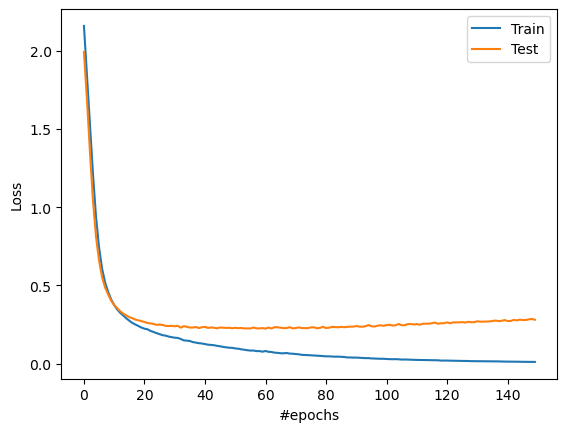

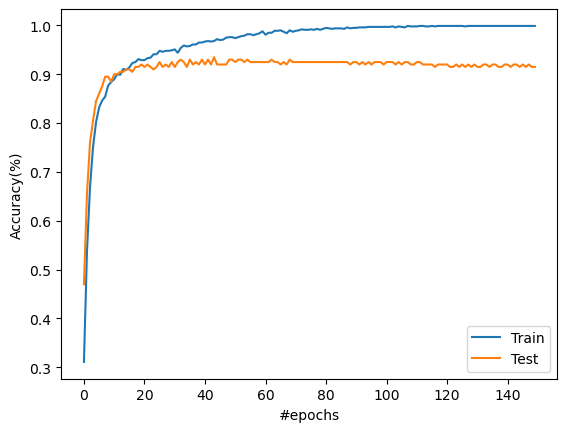

In [3]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ", 
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()